# EDA on Text Data

## Women's E-Commerce Clothing Reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import iplot

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
# !pip install textblob

## Data Import 

In [6]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',
                index_col=0,)

In [7]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [8]:
df.drop(columns=['Title','Clothing ID'], inplace=True)

In [9]:
df.sample(5)

Age                                        Review Text  Rating  \
22765   28  Such a gorgeous weight, cut and style! the but...       5   
1265    63  I ordered this dress in the blood orange and h...       2   
4307    63  Great, stylish, swinging dress. softly draped ...       5   
5360    34                                                NaN       5   
3155    41  Like the last reviewer i saw these pants in th...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
22765                1                        0         General   
1265                 0                        1         General   
4307                 1                        0  General Petite   
5360                 1                        0  General Petite   
3155                 1                        0       Initmates   

      Department Name  Class Name  
22765            Tops  Fine gauge  
1265          Dresses     Dresses  
4307          Dresses     Dresses  
5360             Tops     Blouses  
3155         Intimate       Sleep

In [10]:
df.isnull().mean()*100

Age                        0.000000
Review Text                3.597888
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.059610
Department Name            0.059610
Class Name                 0.059610
dtype: float64

In [11]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [12]:
df.dropna(subset=['Review Text', 'Division Name'], inplace=True)

In [13]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

## Text Cleaning

In [14]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [15]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [16]:
x = "i don't want to fail. "

In [17]:
cont_to_exp(x)

'i do not want to fail. '

In [18]:
%%time
df['Review Text'] = df['Review Text'].apply(lambda x: cont_to_exp(x))

Wall time: 683 ms


In [19]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

## Feature Engineering

In [20]:
from textblob import TextBlob

In [21]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [22]:
df['polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [23]:
df['review_len'] = df['Review Text'].apply(lambda x: len(x))

In [24]:
df['word_count']  = df['Review Text'].apply(lambda x: len(x.split()))

In [25]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)

In [26]:
df['avg_word_len'] = df['Review Text'].apply(lambda x: get_avg_word_len(x))

In [27]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         306          65      3.646154  
2    Dresses  0.073675         500          98      4.112245  
3      Pants  0.550000         125          23      4.478261  
4    Blouses  0.512891         192          36      4.361111

## Distribution of Sentiment Polarity

In [28]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         306          65      3.646154  
2    Dresses  0.073675         500          98      4.112245  
3      Pants  0.550000         125          23      4.478261  
4    Blouses  0.512891         192          36      4.361111

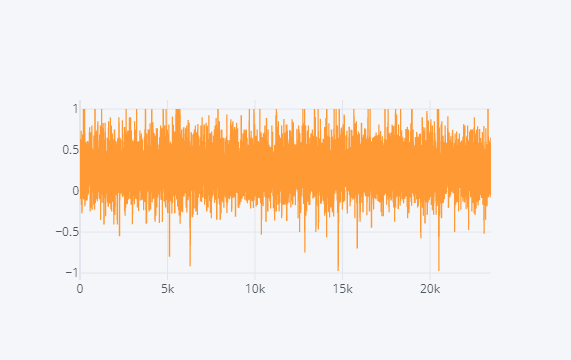

In [29]:
df['polarity'].iplot()

<AxesSubplot: ylabel='Frequency'>

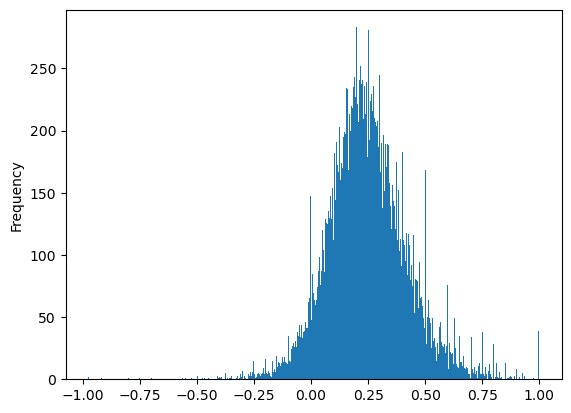

In [30]:
df['polarity'].plot(kind="hist", bins=500)

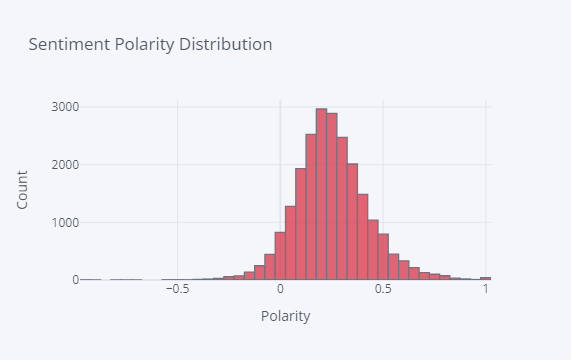

In [31]:
df['polarity'].iplot(kind='hist', color='red', bins=50,
                    xTitle='Polarity', yTitle='Count',
                    title='Sentiment Polarity Distribution')

We have more positive reviews compared to negative reviews which means we have more happier customers.

## Distribution of Reviews Rating and Reviewers Age

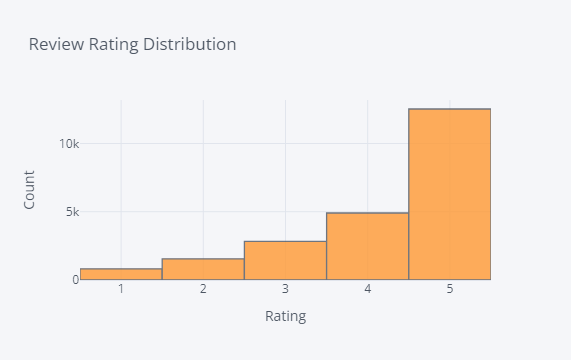

In [32]:
df['Rating'].iplot(kind='hist', xTitle='Rating', yTitle='Count',
                  title='Review Rating Distribution')

In [33]:
df['Rating'].value_counts()

5    12527
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [34]:
df['Rating'].value_counts(normalize=True)*100

5    55.360615
4    21.689942
3    12.475694
2     6.845501
1     3.628248
Name: Rating, dtype: float64

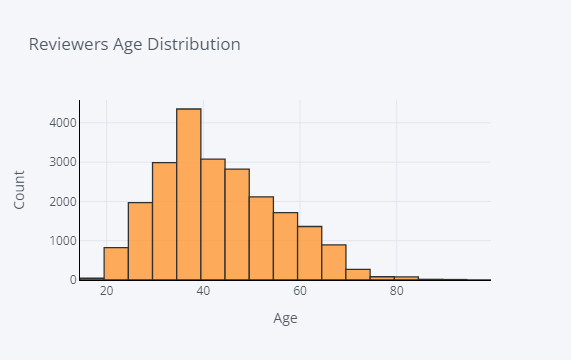

In [35]:
df['Age'].iplot(kind='hist', bins=40, xTitle='Age',
               yTitle='Count', title='Reviewers Age Distribution',
               linecolor='black')

## Distribution of Review Text Length and Word Length

In [36]:
df['review_len'].value_counts()

500    1076
501     922
502     888
503     543
504     380
       ... 
517       1
514       1
34        1
15        1
22        1
Name: review_len, Length: 504, dtype: int64

In [37]:
df['review_len'].value_counts(normalize=True)*100

500    4.755171
501    4.074598
502    3.924342
503    2.399682
504    1.679335
         ...   
517    0.004419
514    0.004419
34     0.004419
15     0.004419
22     0.004419
Name: review_len, Length: 504, dtype: float64

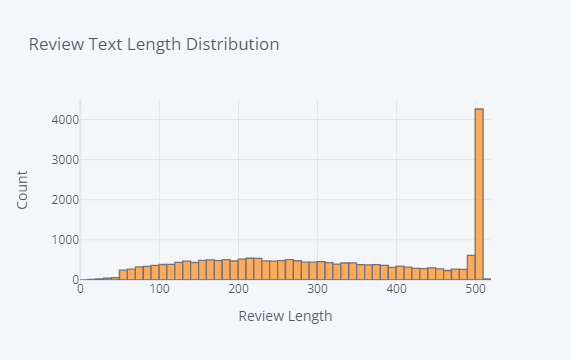

In [38]:
df['review_len'].iplot(kind='hist', xTitle='Review Length',
                      yTitle='Count', title='Review Text Length Distribution')

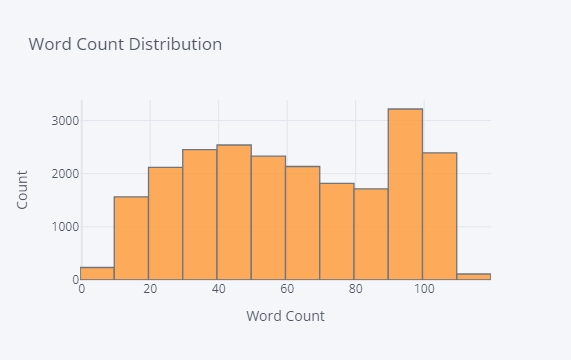

In [39]:
df['word_count'].iplot(kind='hist', xTitle='Word Count',
                      yTitle='Count', title='Word Count Distribution',
                      bins=12)

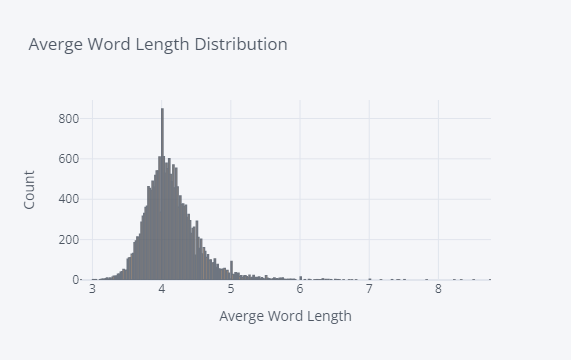

In [40]:
df['avg_word_len'].iplot(kind='hist', xTitle='Averge Word Length',
                      yTitle='Count', title='Averge Word Length Distribution',
                      )

## Distribution of Department, Division, and Class

In [41]:
df['Division Name'].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

In [42]:
df['Division Name'].value_counts(normalize=True)*100

General           59.063992
General Petite    34.634082
Initmates          6.301927
Name: Division Name, dtype: float64

In [43]:
df.groupby('Department Name').count()

Age  Review Text  Rating  Recommended IND  \
Department Name                                                
Bottoms           3662         3662    3662             3662   
Dresses           6145         6145    6145             6145   
Intimate          1653         1653    1653             1653   
Jackets           1002         1002    1002             1002   
Tops             10048        10048   10048            10048   
Trend              118          118     118              118   

                 Positive Feedback Count  Division Name  Class Name  polarity  \
Department Name                                                                 
Bottoms                             3662           3662        3662      3662   
Dresses                             6145           6145        6145      6145   
Intimate                            1653           1653        1653      1653   
Jackets                             1002           1002        1002      1002   
Tops                               10048          10048       10048     10048   
Trend                                118            118         118       118   

                 review_len  word_count  avg_word_len  
Department Name                                        
Bottoms                3662        3662          3662  
Dresses                6145        6145          6145  
Intimate               1653        1653          1653  
Jackets                1002        1002          1002  
Tops                  10048       10048         10048  
Trend                   118         118           118

In [44]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [45]:
df['Department Name'].value_counts(normalize=True)*100

Tops        44.405162
Dresses     27.156620
Bottoms     16.183489
Intimate     7.305109
Jackets      4.428142
Trend        0.521478
Name: Department Name, dtype: float64

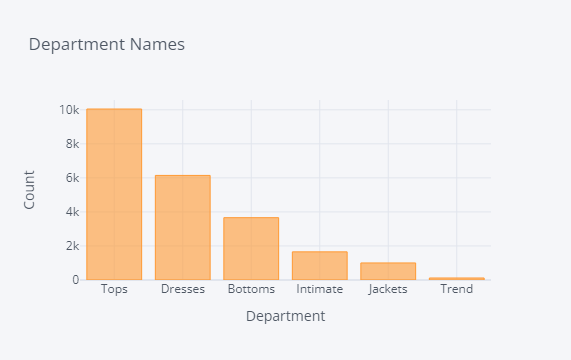

In [46]:
df['Department Name'].value_counts().iplot(kind='bar',xTitle='Department',
                                           yTitle='Count',
                                          title='Department Names')
                                           

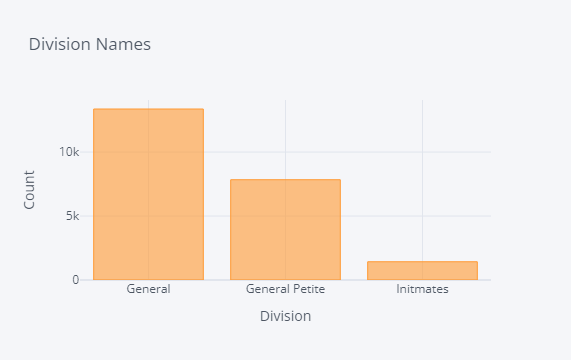

In [47]:
df['Division Name'].value_counts().iplot(kind='bar',xTitle='Division',
                                           yTitle='Count',
                                          title='Division Names')

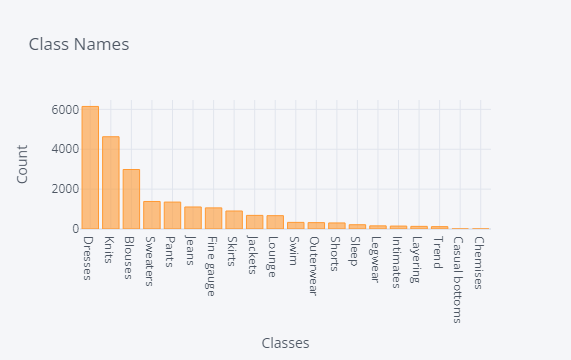

In [48]:
df['Class Name'].value_counts().iplot(kind='bar',xTitle='Classes',
                                           yTitle='Count',
                                          title='Class Names')
                                           

In [49]:
df['Class Name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

In [50]:
df['Class Name'].value_counts(normalize=True)*100

Dresses           27.156620
Knits             20.443698
Blouses           13.182782
Sweaters           6.098639
Pants              5.966060
Jeans              4.878911
Fine gauge         4.680042
Skirts             3.990631
Jackets            3.018384
Lounge             2.956514
Swim               1.467209
Outerwear          1.409758
Shorts             1.343468
Sleep              0.945731
Legwear            0.698250
Intimates          0.649638
Layering           0.583348
Trend              0.521478
Casual bottoms     0.004419
Chemises           0.004419
Name: Class Name, dtype: float64

## Distribution of Unigram, Bigram, and Trigram

In [51]:
x = 'this is a test example'

# unigram = this, is, a, test, example
# Bigram = this is, is a, a test, test example
# trigram = this is a, is a test, a test example

### Unigram

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
x = ['this is a text example test this']

In [54]:
vec = CountVectorizer().fit(x)
vec

CountVectorizer()

In [55]:
bow= vec.transform(x)
bow

<1x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [56]:
sum_words = bow.sum(axis=0)
sum_words

matrix([[1, 1, 1, 1, 2]], dtype=int64)

In [57]:
vec.vocabulary_.items()

dict_items([('this', 4), ('is', 1), ('text', 3), ('example', 0), ('test', 2)])

In [58]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

In [59]:
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('this', 2), ('is', 1), ('text', 1), ('example', 1), ('test', 1)]

In [60]:
def get_top_n_words(x, n=5):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x:x[1], reverse=True)
    return words_freq[:n]

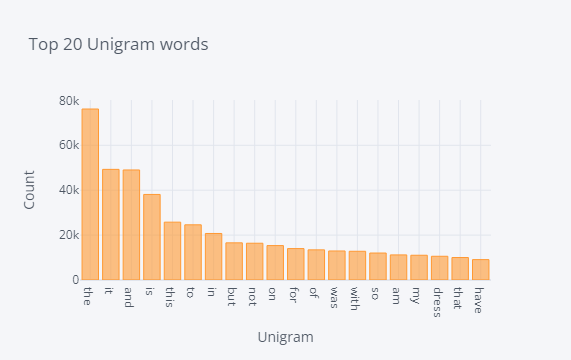

In [61]:
words = get_top_n_words(df['Review Text'], 20)
df1 = pd.DataFrame(words)
df1.columns = ['Unigram', 'Frequency']
df1.set_index('Unigram',inplace=True)
df1.iplot(kind='bar',xTitle='Unigram',yTitle='Count',
         title='Top 20 Unigram words')

### Bigram

In [62]:
def get_top_n_bigram_words(x, n=5):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x:x[1], reverse=True)
    return words_freq[:n]

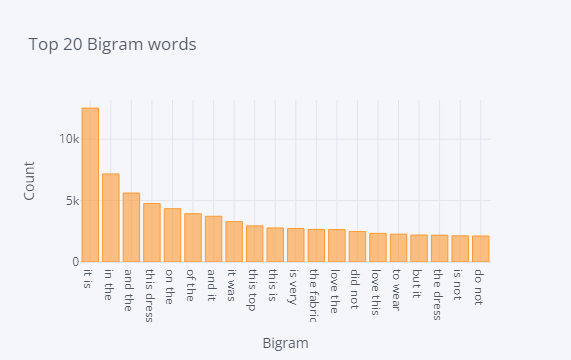

In [63]:
bigram_words = get_top_n_bigram_words(df['Review Text'], 20)
df2 = pd.DataFrame(bigram_words)
df2.columns = ['Bigram', 'Frequency']
df2.set_index('Bigram',inplace=True)
df2.iplot(kind='bar',xTitle='Bigram',yTitle='Count',
         title='Top 20 Bigram words')

### Trigram 

In [64]:
def get_top_n_trigram_words(x, n=5):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x:x[1], reverse=True)
    return words_freq[:n]

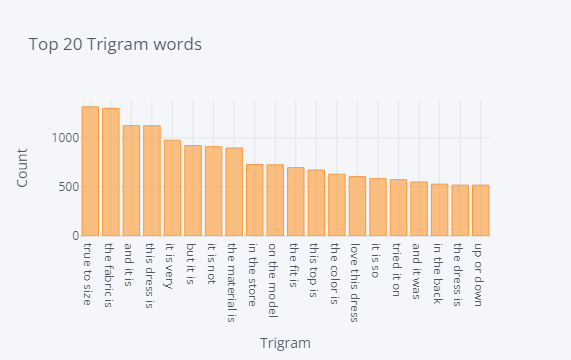

In [65]:
trigram_words = get_top_n_trigram_words(df['Review Text'], 20)
df2 = pd.DataFrame(trigram_words)
df2.columns = ['Trigram', 'Frequency']
df2.set_index('Trigram',inplace=True)
df2.iplot(kind='bar',xTitle='Trigram',yTitle='Count',
         title='Top 20 Trigram words')

## Distribution of Unigram, Bigram and Trigram without Stop Words

### Unigram

In [66]:
def get_top_n_words(x, n=5):
    vec = CountVectorizer(stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x:x[1], reverse=True)
    return words_freq[:n]

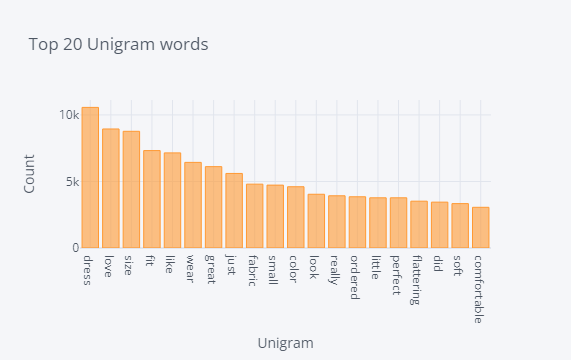

In [67]:
words = get_top_n_words(df['Review Text'], 20)
df1 = pd.DataFrame(words)
df1.columns = ['Unigram', 'Frequency']
df1.set_index('Unigram',inplace=True)
df1.iplot(kind='bar',xTitle='Unigram',yTitle='Count',
         title='Top 20 Unigram words')

### Bigram

In [68]:
def get_top_n_bigram_words(x, n=5):
    vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x:x[1], reverse=True)
    return words_freq[:n]

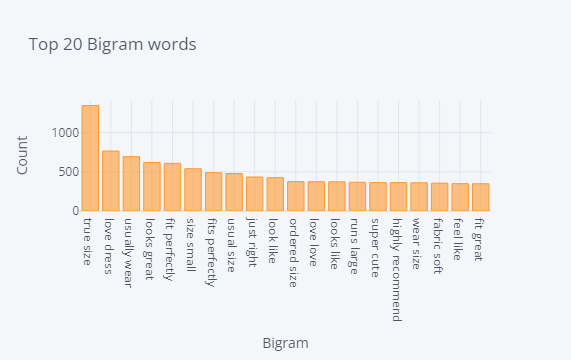

In [69]:
bigram_words = get_top_n_bigram_words(df['Review Text'], 20)
df2 = pd.DataFrame(bigram_words)
df2.columns = ['Bigram', 'Frequency']
df2.set_index('Bigram',inplace=True)
df2.iplot(kind='bar',xTitle='Bigram',yTitle='Count',
         title='Top 20 Bigram words')

### Trigram

In [70]:
def get_top_n_trigram_words(x, n=5):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x:x[1], reverse=True)
    return words_freq[:n]

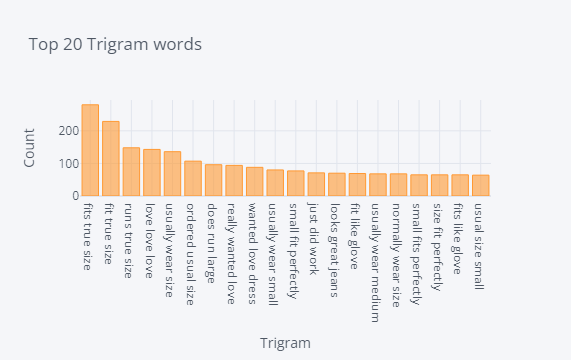

In [71]:
trigram_words = get_top_n_trigram_words(df['Review Text'], 20)
df2 = pd.DataFrame(trigram_words)
df2.columns = ['Trigram', 'Frequency']
df2.set_index('Trigram',inplace=True)
df2.iplot(kind='bar',xTitle='Trigram',yTitle='Count',
         title='Top 20 Trigram words')

## Bivariate Analysis

In [84]:
df.head(2)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   
1                1                        4       General         Dresses   

  Class Name  polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         306          65      3.646154

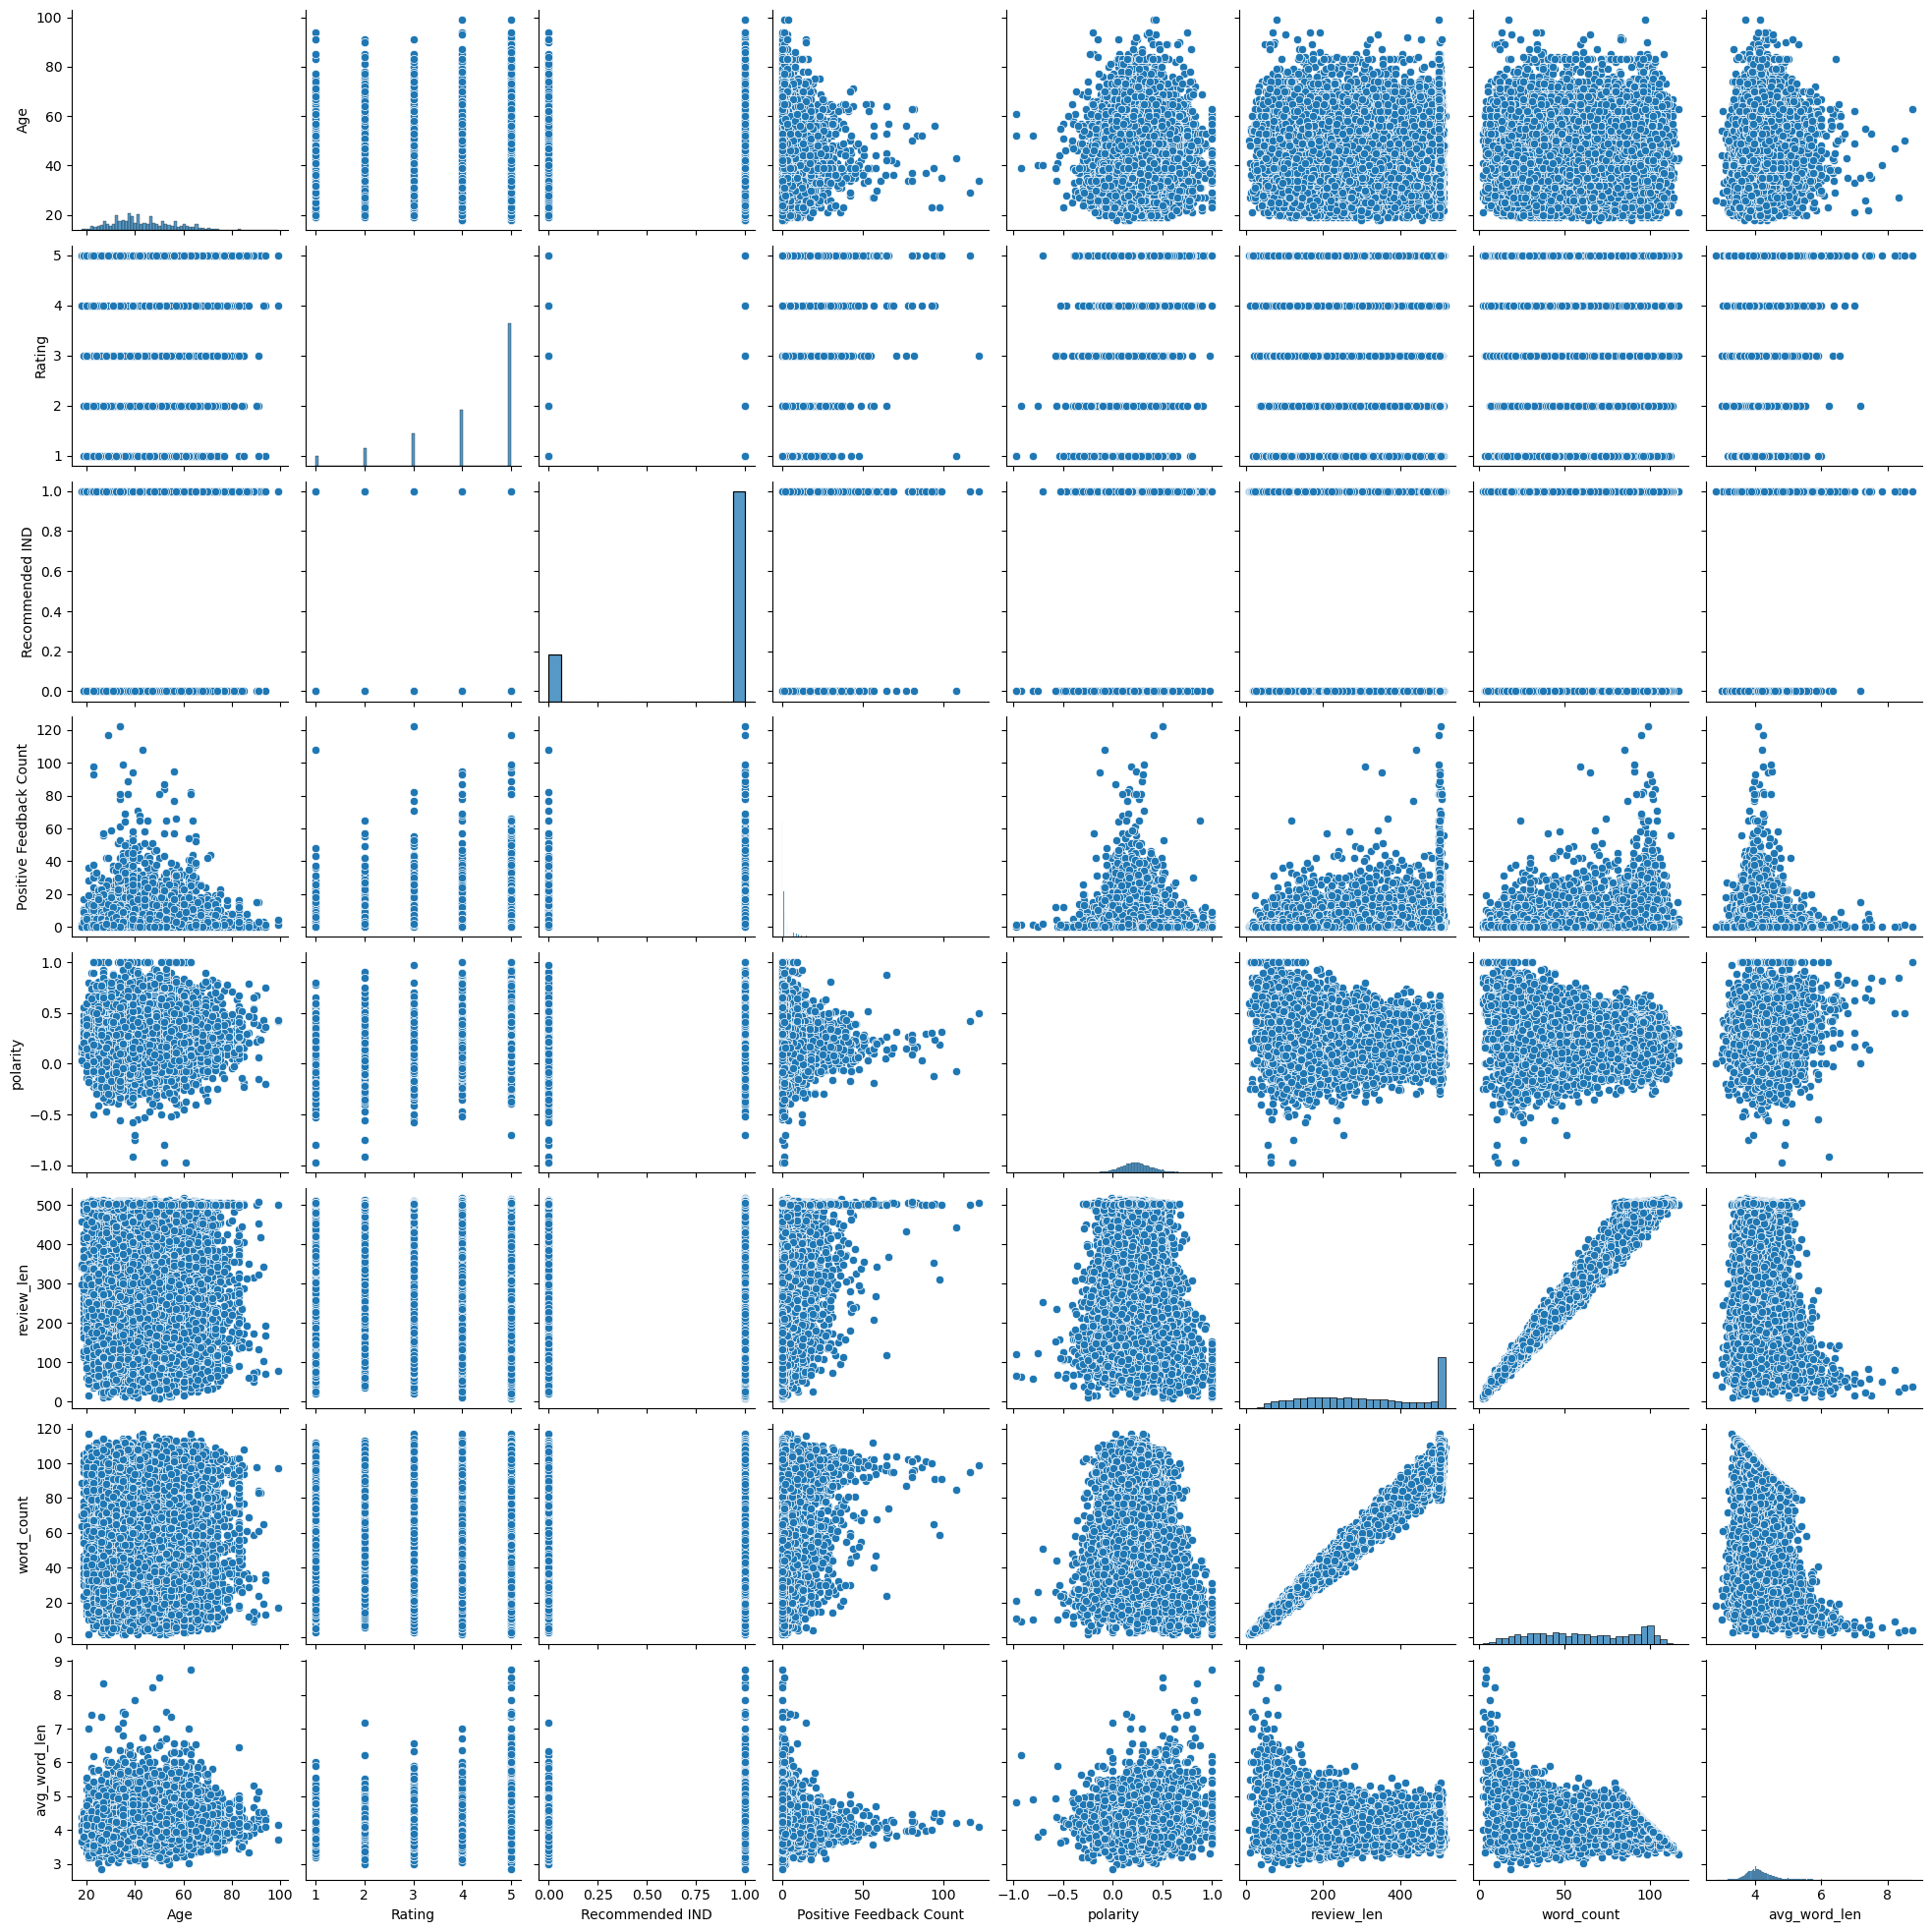

In [85]:
sns.pairplot(data=df)

### Polarity vs Division Name

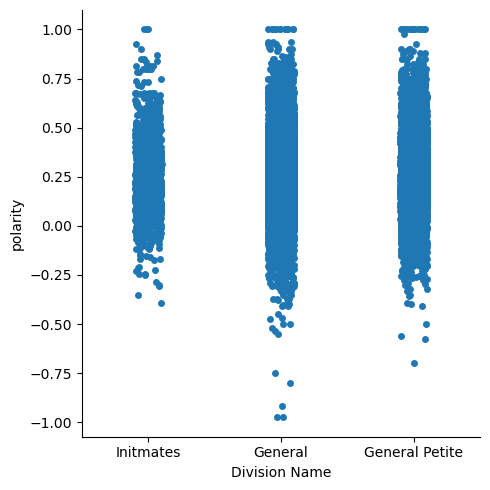

In [92]:
sns.catplot(x='Division Name', y='polarity', data=df)

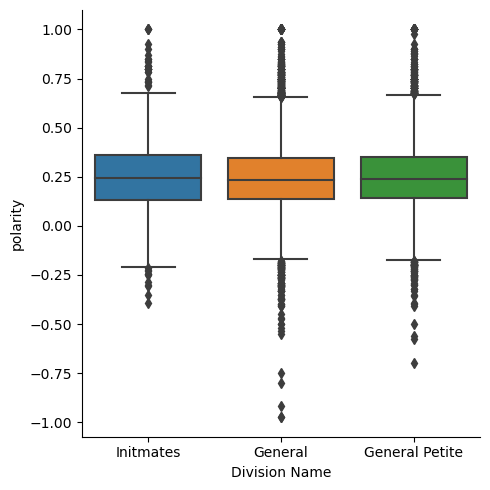

In [93]:
sns.catplot(x='Division Name', y='polarity', data=df, kind='box')

### Polarity vs Department Name

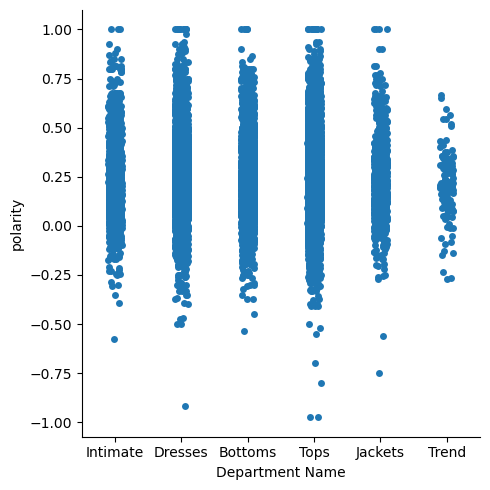

In [97]:
sns.catplot(x='Department Name', y='polarity', data=df)

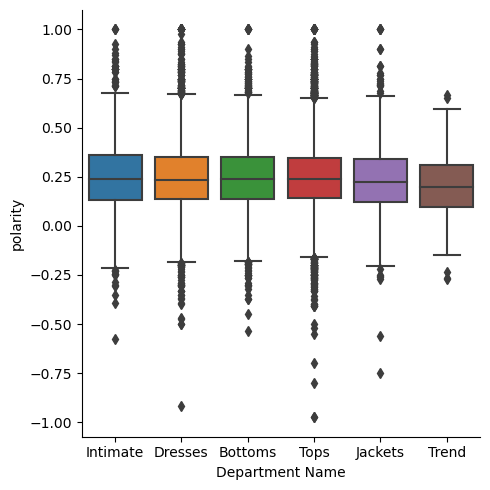

In [98]:
sns.catplot(x='Department Name', y='polarity', data=df,kind='box')

### Review Length vs Division Name

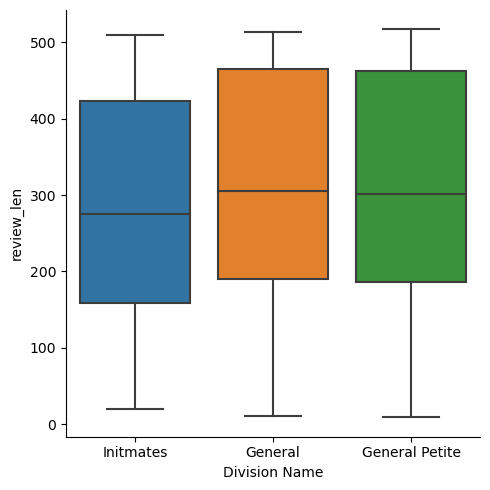

In [100]:
sns.catplot(x='Division Name', y='review_len', data=df , kind='box')

### Review Length vs Department Name

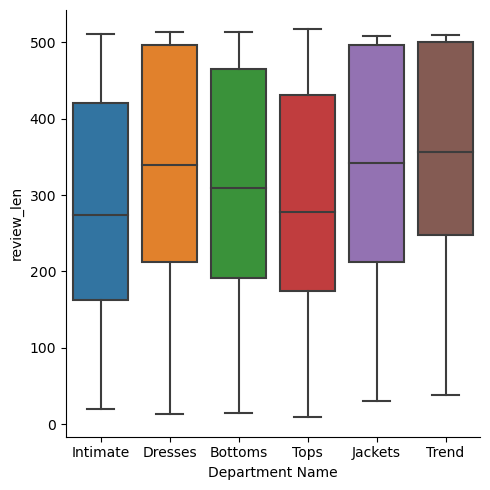

In [101]:
sns.catplot(x='Department Name', y='review_len', data=df , kind='box')

### Polarity vs Recommended or not

In [102]:
import plotly.express as px
import plotly.graph_objects as go

In [125]:
x1 = df.loc[df['Recommended IND'] == 1]['polarity']
x0 = df.loc[df['Recommended IND'] == 0]['polarity']

In [126]:
trace0 = go.Histogram(x=x0, name='Not Recommended', opacity=0.8)
trace1 = go.Histogram(x=x1, name='Recommended', opacity=0.8)

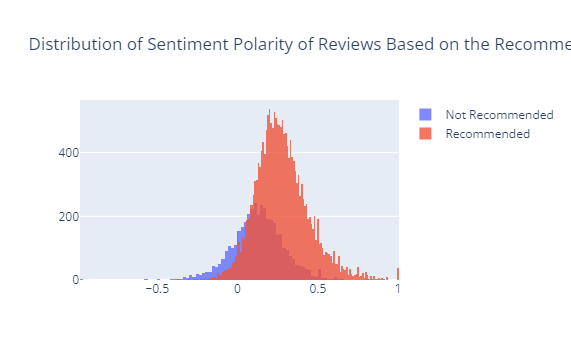

In [127]:
data= [trace0, trace1]
layout = go.Layout(barmode='overlay', 
                   title='Distribution of Sentiment Polarity of Reviews Based on the Recommendation')
fig = go.Figure(data=data, layout=layout)
fig.show()

## Distribution of Ratings based on the Recommendation

In [128]:
import plotly.express as px
import plotly.graph_objects as go

In [129]:
x1 = df.loc[df['Recommended IND'] == 1]['Rating']
x0 = df.loc[df['Recommended IND'] == 0]['Rating']

In [134]:
trace0 = go.Histogram(x=x0, name='Not Recommended', opacity=0.8)
trace1 = go.Histogram(x=x1, name='Recommended', opacity=0.8)

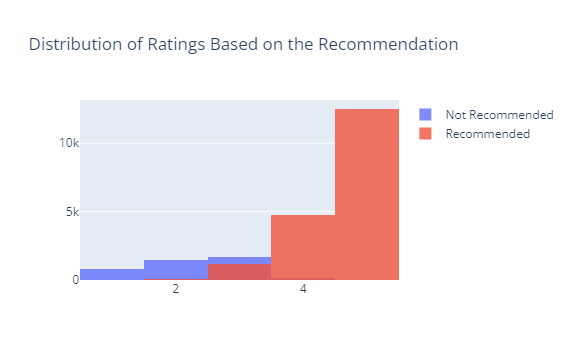

In [135]:
data= [trace0, trace1]
layout = go.Layout(barmode='overlay', 
                   title='Distribution of Ratings Based on the Recommendation')
fig = go.Figure(data=data, layout=layout)
fig.show()

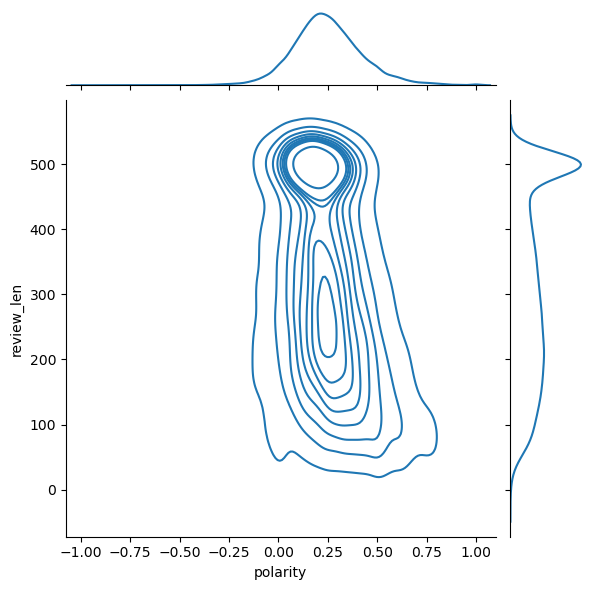

In [138]:
sns.jointplot(x='polarity', y='review_len', data=df, kind='kde')

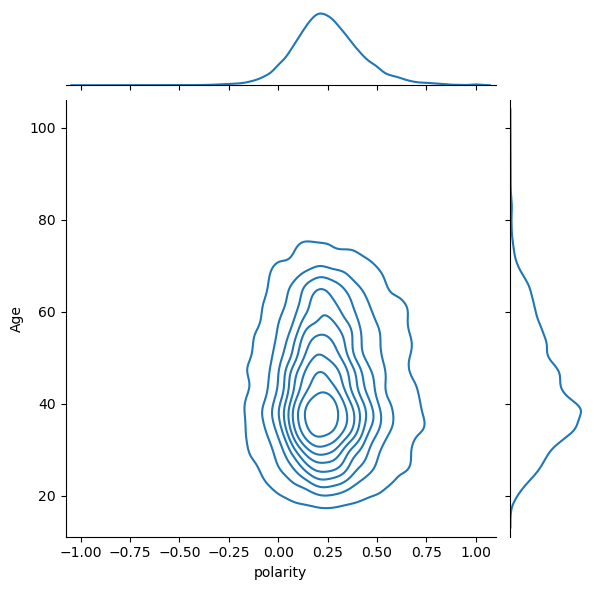

In [139]:
sns.jointplot(x='polarity', y='Age', data=df, kind='kde')